<img src = "images/Logo.png" width = 220, align = "left">

<h1 align=center><font size = 6>Weight as function of height</font></h1>
<h2 align=center><font size = 5>Lab Exercise 2.4</font></h2>
<h3 align=center><font size = 4><b>Advanced Machine Learning<br></b><small>From Theory to Practice with NumPy and scikit-learn<br><i>Volume 1: Generalized Linear Models</i></font></h3>

## Introduction

In this example, we take another relatively small dataset containing weight (measured in pounds) and height (measured in inches) of 200 adolescents. It is natural to assume that the larger a person the bigger his/her weight is. So we will build a simple linear regression model taking as input the height (independent variable $x$) and output as the weight (dependent variable $y$) of an individual. This will be a good example showing the importance of including the intercept term in the simple linear regression model. We also show in this example that there are cases when the intercept term might not have any interpretability either because you cannot set for the input to be zero (even a newborn has some strictly positive height) and/or the intercept value does not make sense (for example, a negative weight). <br>
**Note**: *The original dataset can be found at http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights. This represents only the "Sample of 200 Individuals" data set.*

### Table of contents
1. [Reading the data](#ReadingData)
2. [Scatter plot of the observations](#ScatterPlot)
3. [Calculate the parameters and plot the estimated regression line](#PlotEstRigrLine)
4. [Calculate RSE and R-squared](#CalcRSER2)
5. [Linear model without intercept](#ModelNoIntercept)

## 1. Reading the data <a name="ReadingData"></a>

As a first step, we import the required libraries and set for the drawing to be inline.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

Read the WeightHeightSample.csv file into a pandas dataframe which contains the weight and height of 200 adolescents.

In [2]:
data = pd.read_csv(os.path.join('data','HeightWeightSample.csv'))

Next, print out the dataset to have the first glimpse of it. The dataset contains three columns: Index, Height (in inches), and  Weight (in pounds). There are 200 unordered data points (observations). <br>
**Note**: *Indexing of pandas dataframe, as well as numpy ndarrays, starts from zero and not from one. The Index column shown below is not equivalent to the pandas indexing.*

In [3]:
print("Dataset of the height vs. weight:")
print("===============================================\n",data.to_string(index=False))

Dataset of the height vs. weight:
  Index  Height(Inches)  Weight(Pounds)
     1           65.78          112.99
     2           71.52          136.49
     3           69.40          153.03
     4           68.22          142.34
     5           67.79          144.30
     6           68.70          123.30
     7           69.80          141.49
     8           70.01          136.46
     9           67.90          112.37
    10           66.78          120.67
    11           66.49          127.45
    12           67.62          114.14
    13           68.30          125.61
    14           67.12          122.46
    15           68.28          116.09
    16           71.09          140.00
    17           66.46          129.50
    18           68.65          142.97
    19           71.23          137.90
    20           67.13          124.04
    21           67.83          141.28
    22           68.88          143.54
    23           63.48           97.90
    24           68.42       

Extract the input and output values from the pandas dataframe into vectors $\mathbf{x}$ and $\mathbf{y}$. Also, extract the number of observations $N$ available in the dataset. <br>

**Note**: * To follow the mathematical notations of the book the following naming convention is applied for variables in the code: scalar variables will use lower case, vector variables will use lower case followed by an underscore (no bold letters can be applied, so the underscore represents the vector notation), and matrix variables will use upper case.* 

In [4]:
x_=np.array(data["Height(Inches)"])[:,np.newaxis]
y_=np.array(data["Weight(Pounds)"])[:,np.newaxis]
N,_=data.shape
print("Number of samples in the dataset =",N)

Number of samples in the dataset = 200


## 2. Scatter plot of the observations <a name="ScatterPlot"></a>

Make a scatterplot of the observations from the dataset to have a grasp about your data. If you want to apply linear regression, a first visual check is always useful to see the trend in your data.

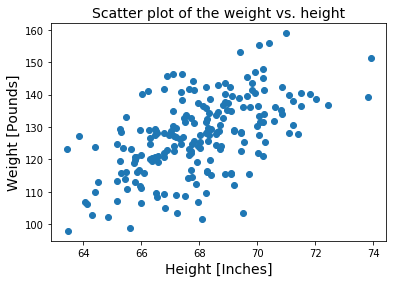

In [5]:
plt.scatter(x_,y_)
plt.xlabel("Height [Inches]",fontsize=14)
plt.ylabel("Weight [Pounds]",fontsize=14)
plt.title("Scatter plot of the weight vs. height",fontsize=14)
plt.show()

As we expected, there is some linear trend between the height and weight of an individual based on the scatter plot of the observations.

## 3. Calculate the parameters and plot the estimated regression line <a name="PlotEstRigrLine"></a>

Calculate the slope and the intercept of the estimated regression line using the formulas deduced in the book:
1. $w=\frac{\mathrm{\Sigma} (\mathbf{y}-\overline y)(\mathbf{x}-\overline x)}{\mathrm{\Sigma} (\mathbf{x}-\overline x)^2}$
2. $b=\overline y - w\cdot \overline x$

**Note**: *Conversion from the mathematical notation to Python code is straightforward when using NumPy operators and methods.*

In [6]:
w=np.sum((y_-y_.mean())*(x_-x_.mean()))/np.sum((x_-x_.mean())**2)   # (1)
b=y_.mean()-w*x_.mean()                                             # (2)
print("Slope of the estimated regression line: w =",w)
print("Intercept of the estimated regression line: b =",b)

Slope of the estimated regression line: w = 3.4326761292716284
Intercept of the estimated regression line: b = -106.02770644878129


Oops! The intercept term is negative which does not make sense. First of all, the input cannot be set to 0 as an adolescent always have a strictly positive height. Second, there is no negative weight. Let's, define the prediction function $\hat y=f(x)$ which can be used later on for making predictions on weight for a person with a height not contained in the dataset. <br>
**Note**: *The function can take as an argument either a scalar value (returning a scalar value) or a vector (returning a vector).*

In [7]:
def f(x):
  yhat=x*w+b
  return yhat

Let's, plot the so-called estimated regression line across the scatter plot of the observations.

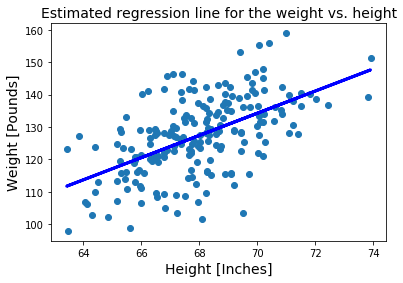

In [8]:
plt.scatter(x_,y_)
plt.plot(x_,f(x_),'-b',lw=3)
plt.xlabel("Height [Inches]",fontsize=14)
plt.ylabel("Weight [Pounds]",fontsize=14)
plt.title("Estimated regression line for the weight vs. height",fontsize=14)
plt.show()

Now, let's see how the data looks like when we extend the estimated regression line until it intersects the $y$ axis.

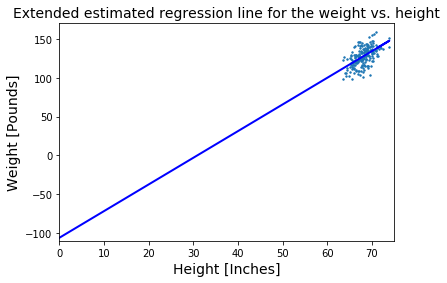

In [9]:
plt.scatter(x_,y_,s=2)
x1_=np.insert(x_,0,0,axis=0)
plt.plot(x1_,f(x1_),'-b',lw=2)
plt.xlim(0,75)
plt.ylim(-110,170)
plt.xlabel("Height [Inches]",fontsize=14)
plt.ylabel("Weight [Pounds]",fontsize=14)
plt.title("Extended estimated regression line for the weight vs. height",fontsize=14)
plt.show()

There two main problems when trying to interpret the intercept term:
1. There is no meaning in setting the input to zero (height is always greater than zero)
2. The intercept term is negative (no negative weight is possible)

The main problem is that the observations are far away from $x=0$ so does not make sense to extrapolate. This is a good example of why one should avoid trying to find a meaning for the intercept term in all cases.

## 4. Calculate RSE and R-squared <a name="CalcRSER2"></a>

Let's calculate the standard error of estimate and the R-squared values.

In [10]:
RSS=np.sum((y_-f(x_))**2)
RSE=np.sqrt(RSS/(N-2))
print("Standard error of estimate is: RSE =",RSE)

Standard error of estimate is: RSE = 9.959867215170659


From the standard error of estimate, we can conclude that when predicting the average weight for a given height of an adolescent, the error made is 9.96 pounds on average.

In [11]:
SST=np.sum((y_-y_.mean())**2)
R2=1-RSS/SST
print("The coefficient of determination: R2 =",R2)

The coefficient of determination: R2 = 0.31009833265482645


The R-squared value (coefficient of determination) is very low. This indicates that the majority of the variation in weight is dictated by factors other than the height. That is not a surprise, with the same height one adolescent is thin while the other is fat.

## 5. Linear model without intercept <a name="ModelNoIntercept"></a>

Let's see the effect of omitting the intercept term by setting $b=0$. That implies that the estimated regression line passes through the origin $\left \{x=0,y=0 \right \}$. We also know that the estimated regression line passes through the mean of input and output, which is $\left \{\overline x,\overline y \right \}$. The slope is the fraction of change of $y$ over the change of $x$. Thus, we can compute the slope very easy: 

In [12]:
w1=y_.mean()/x_.mean()
print("Slope when there is no intercept term is:", w1)

Slope when there is no intercept term is: 1.8722932223494404


Comparing this value with the original one, we can conclude that the slope is decreased when the intercept term is omitted.  But the slope defines how much the output changes when the input changes with one unit. Thus, when the intercept is omitted, the prediction will overestimate the weight for height below the average and overestimate the weight for height above the average. Let's, make the plot.

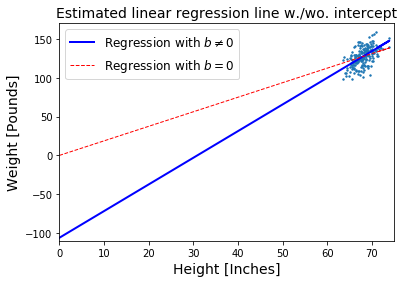

In [13]:
plt.scatter(x_,y_,s=2)
x1_=np.insert(x_,0,0,axis=0)
line1,=plt.plot(x1_,f(x1_),'-b',lw=2)
line2,=plt.plot(x1_,w1*x1_,'--r',lw=1)
plt.xlim(0,75)
plt.ylim(-110,170)
plt.legend([line1,line2],[r'Regression with $b \neq 0$',"Regression with $b=0$"],fontsize=12)
plt.xlabel("Height [Inches]",fontsize=14)
plt.ylabel("Weight [Pounds]",fontsize=14)
plt.title("Estimated linear regression line w./wo. intercept",fontsize=14)
plt.show()

Let's make the plotting focusing on the data set.

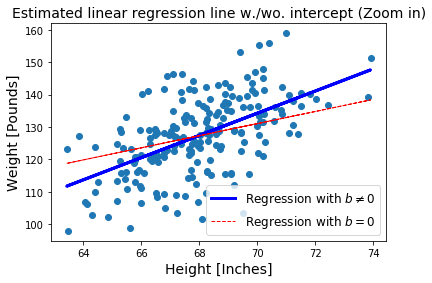

In [14]:
plt.scatter(x_,y_)
line1,=plt.plot(x_,f(x_),'-b',lw=3)
line2,=plt.plot(x_,w1*x_,'--r',lw=1)
plt.legend([line1,line2],[r'Regression with $b \neq 0$',"Regression with $b=0$"],fontsize=12)
plt.xlabel("Height [Inches]",fontsize=14)
plt.ylabel("Weight [Pounds]",fontsize=14)
plt.title("Estimated linear regression line w./wo. intercept (Zoom in)",fontsize=14)
plt.show()

It can be concluded that, in case we omit the intercept term from the model, our prediction will be biased. That is, the further the input is from its mean, the higher the prediction error will be. For an adolescent with a small height the average weight will be overestimated, while for tall adolescents the average weight will be underestimated. When calculating the standard error of estimate, a slight increase is observed (around half unit of increase).

In [15]:
RSS1=np.sum((y_-w1*x_)**2)
RSE1=np.sqrt(RSS1/(N-2))
print("Standard error of estimate wo. intercept: RSE =",RSE1)

Standard error of estimate wo. intercept: RSE = 10.412121423445107


Similarly, the R-squared value is decreased.

In [16]:
SST=np.sum((y_-y_.mean())**2)
R2_1=1-RSS1/SST
print("The coefficient of determination wo. intercept: R2 =",R2_1)

The coefficient of determination wo. intercept: R2 = 0.24602222245178695


We can conclude that while the intercept term does not have any meaning in this example, its inclusion in the linear regression model is vital.

<img src = "images/AML1-Cover.png" width = 90, align = "left" style="margin:0px 20px">

**Note:** This Jupyter Notebook is accompanying the book: <br><i>"Machine Learning - From Theory to Practice with NumPy and scikit-learn, Volume 1: Generalized Linear Models"</i><br>
by Ferenc Farkas, Ph.D. 

If you find this Notebook useful, please support me by buying the book at [Leanpub](http://leanpub.com/AML1). <br>
Copyright notice: This Jupyter Notebook is made available under the [MIT License](https://opensource.org/licenses/MIT).